# OCR de notas fiscais

1) Faça o upload da nota para esse notebook

2) Mude os parâmetros **api_key** e **file_name**

3) Rode o código

In [36]:
%%capture
!pip install mistralai

id='img-0.jpeg' top_left_x=145 top_left_y=128 bottom_right_x=1502 bottom_right_y=1915 image_base64=''
{
    "pages": [
        {
            "index": 0,
            "markdown": "![img-0.jpeg](img-0.jpeg)",
            "images": [
                {
                    "id": "img-0.jpeg",
                    "top_left_x": 145,
                    "top_left_y": 128,
                    "bottom_right_x": 1502,
                    "bottom_right_y": 1915,
                    "image_base64": ""
                }
            ],
            "dimensions": {
                "dpi": 200,
                "height": 2339,
                "width": 1653
            }
        }
    ],
    "model": "mistral-ocr-2503-completion",
    "usage_info": {
        "pages_processed": 1,
        "doc_size_bytes": 37490
    }
}

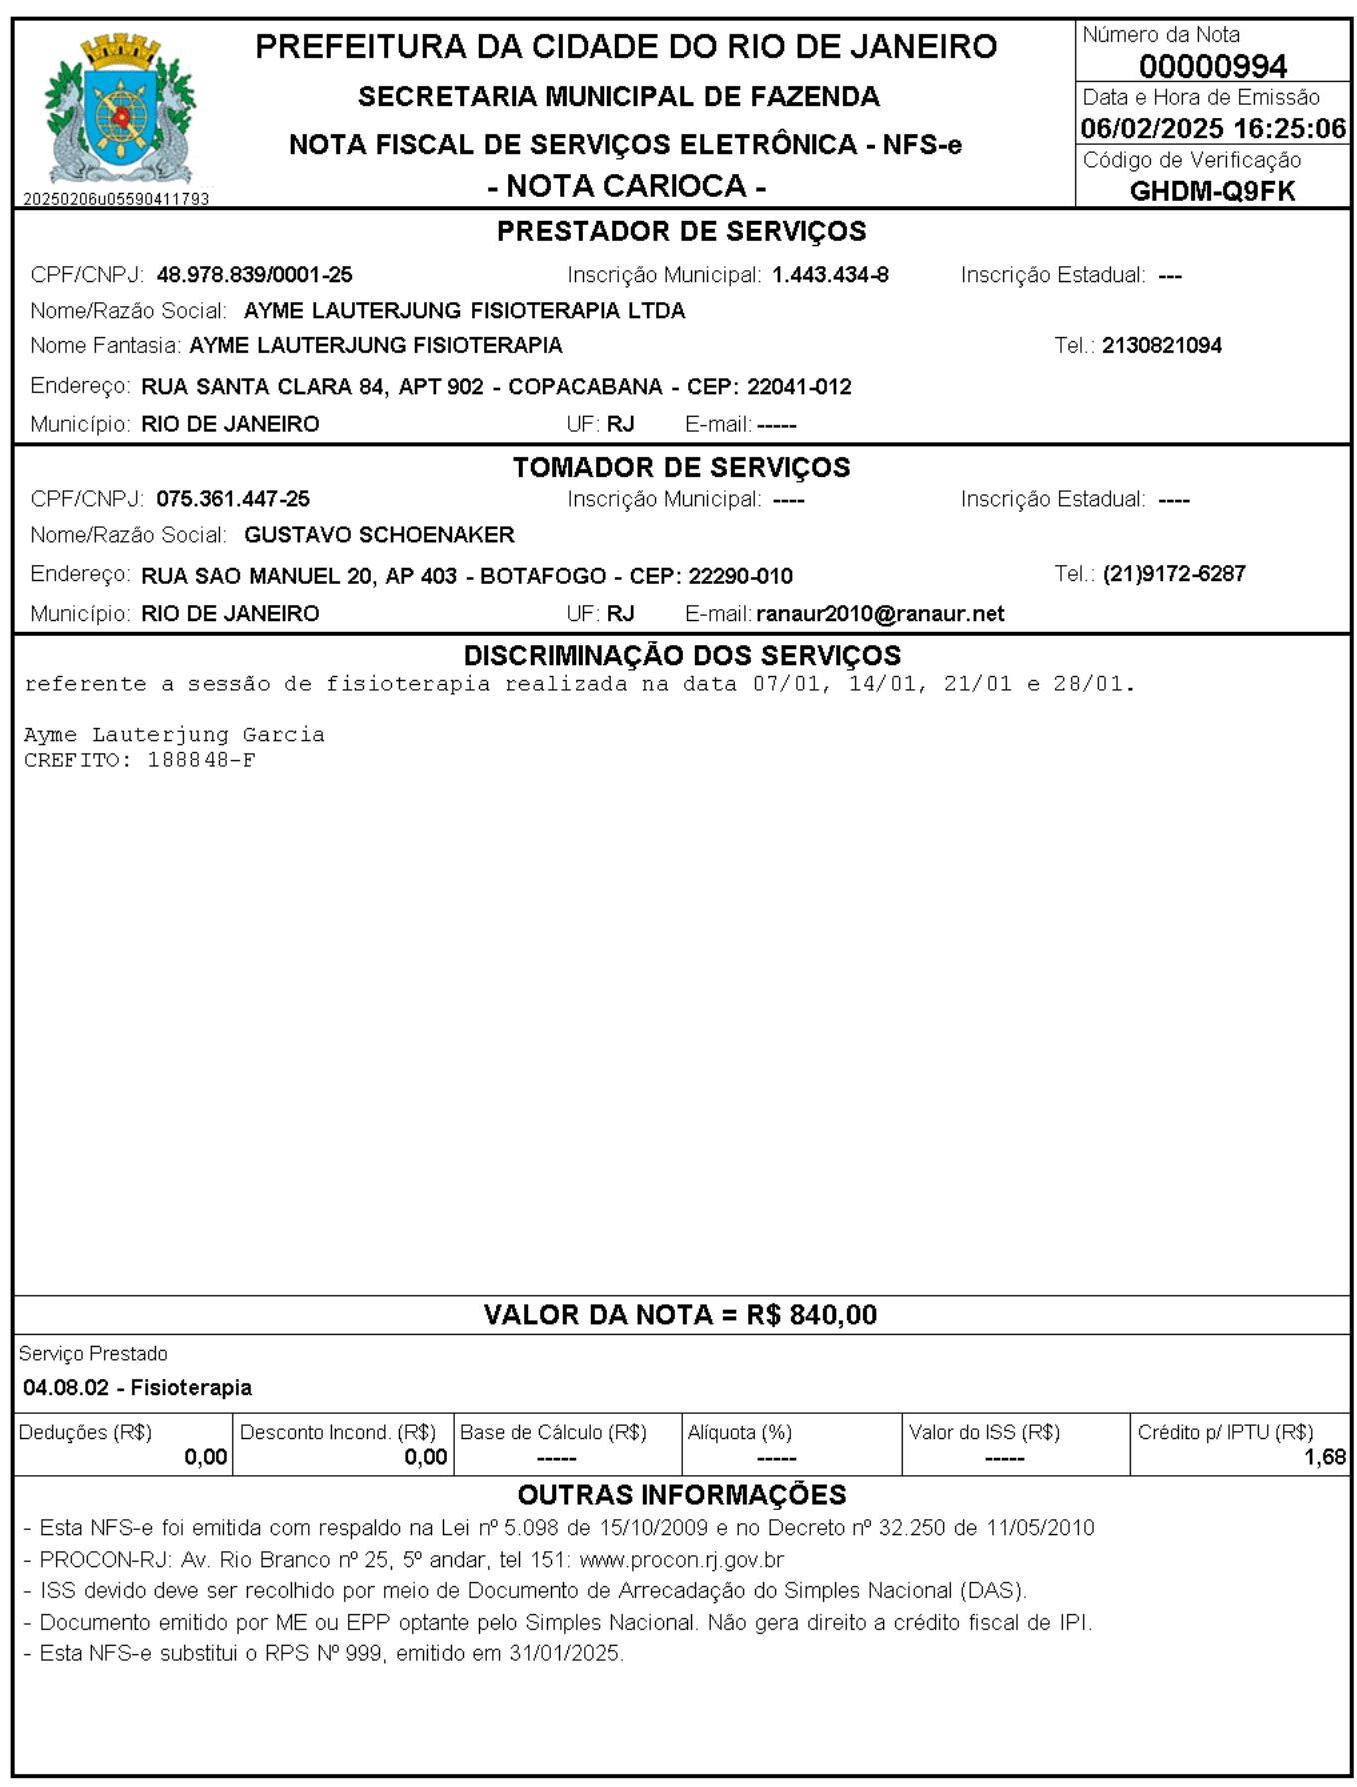
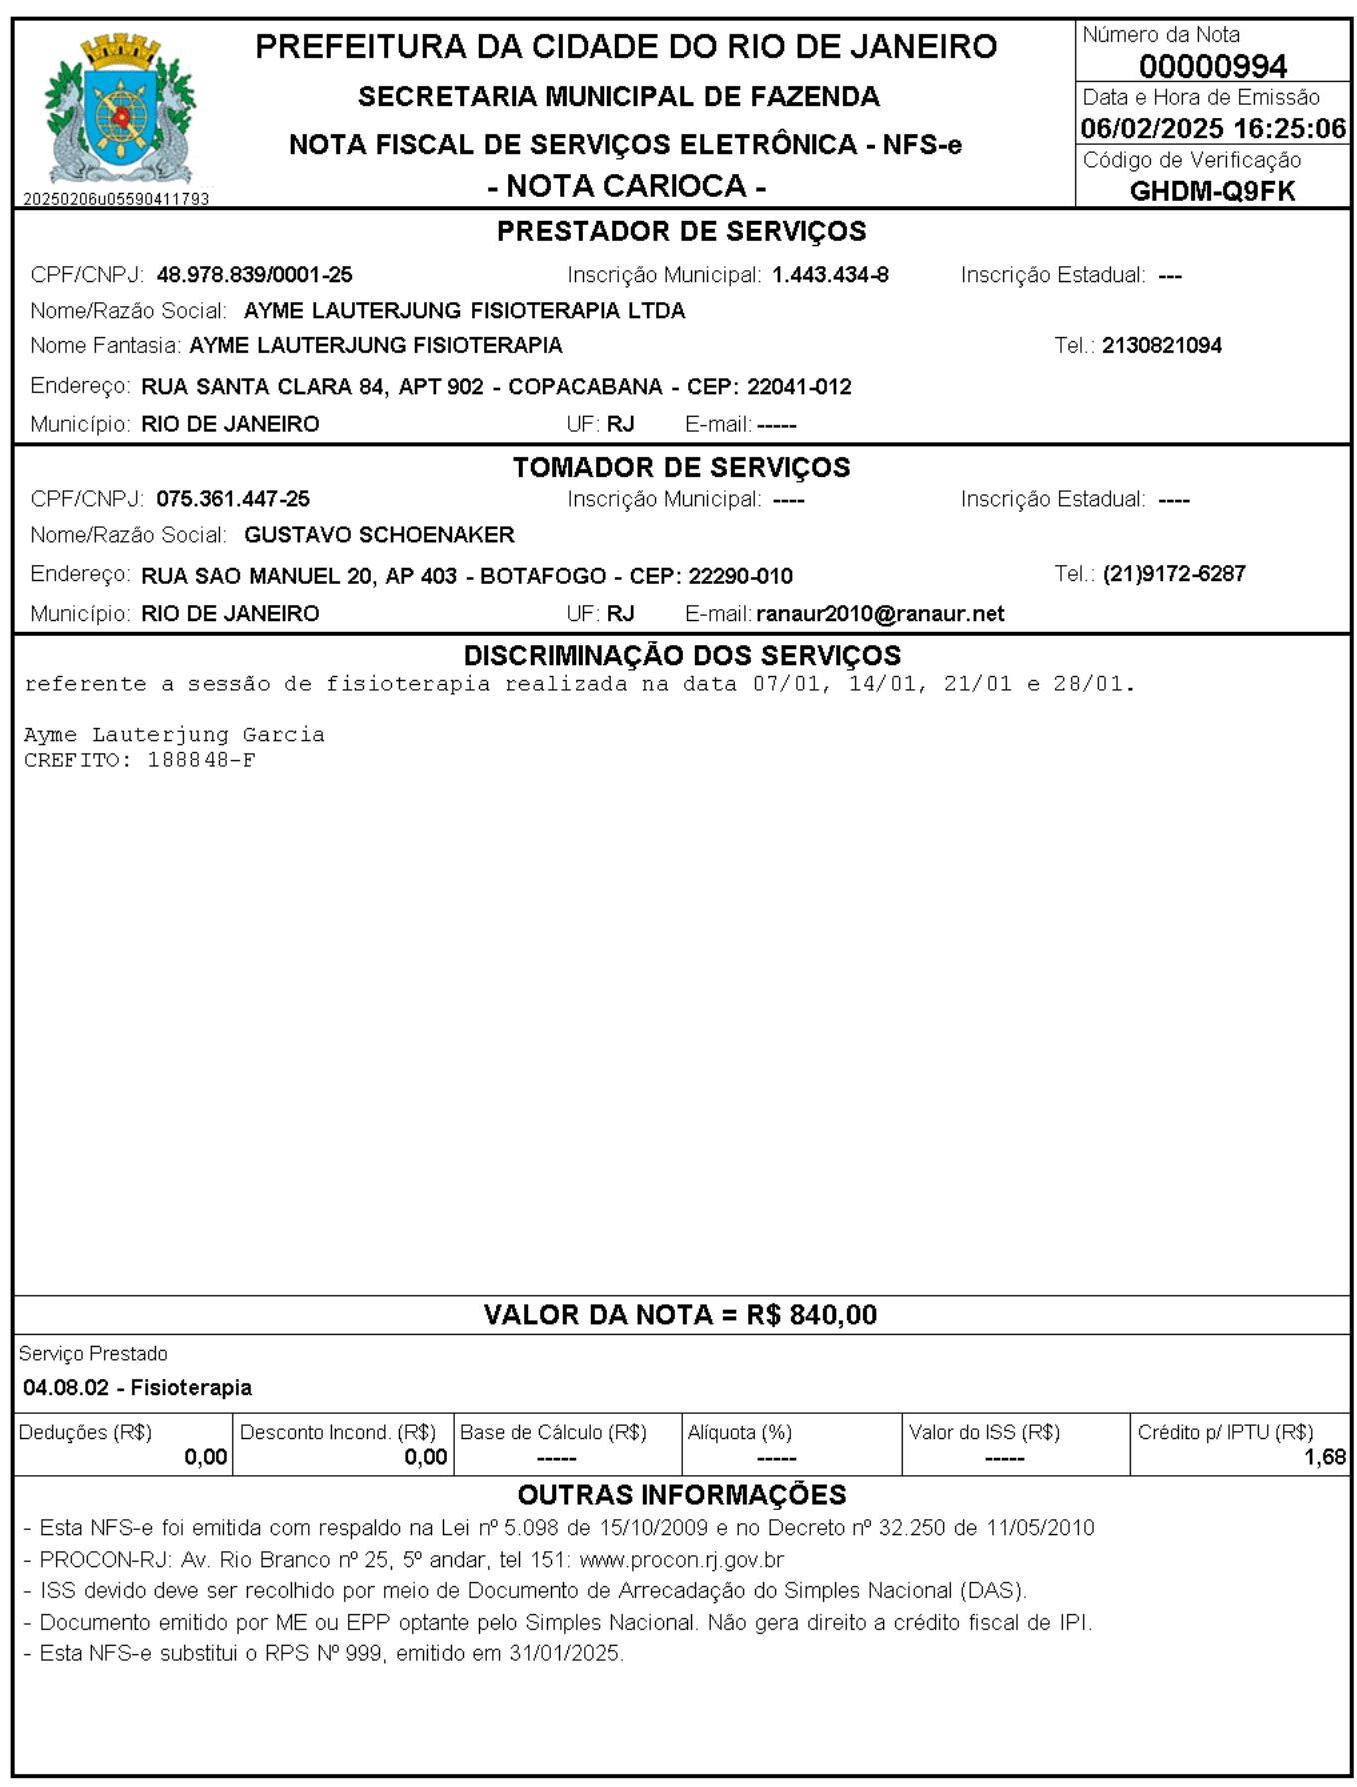

In [37]:
from google.colab import userdata

# Initialize Mistral client with API key
from mistralai import Mistral

file_name = "/content/NFSe_00000994_14434348.pdf"
api_key = userdata.get('mistral_api_key') # Replace with your API key
client = Mistral(api_key=api_key)

# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

# Verify PDF file exists
pdf_file = Path(file_name)
assert pdf_file.is_file()

# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)


In [39]:
for page in pdf_response.pages:
  for image in page.images:
    # Process image with OCR
    image_response = client.ocr.process(
        document=ImageURLChunk(image_url=image.image_base64),
        model="mistral-ocr-latest"
    )

    print(image_response.pages[0].markdown)

# Convert response to JSON format
#response_dict = json.loads(pdf_response.model_dump_json())
print("xxx")


![img-0.jpeg](img-0.jpeg)

PREFEITURA DA CIDADE DO RIO DE JANEIRO SECRETARIA MUNICIPAL DE FAZENDA NOTA FISCAL DE SERVIÇOS ELETRÔNICA - NFS-e - NOTA CARIOCA -

# PRESTADOR DE SERVIÇOS 

CPF/CNPJ: 48.978.839/0001-25
Inscrição Municipal: 1.443.434-8
Inscrição Estadual: ---
Nome/Razão Social: AYME LAUTERJUNG FISIOTERAPIA LTDA
Nome Fantasia: AYME LAUTERJUNG FISIOTERAPIA
Tél.: 2130821094
Endereço: RUA SANTA CLARA 84, APT 902 - COPACABANA - CEP: 22041-012
Município: RIO DE JANEIRO
UF: RJ E-mail: -----

## TOMADOR DE SERVIÇOS

CPF/CNPJ: 075.361.447-25
Inscrição Municipal: ---
Nome/Razão Social: GUSTAVO SCHOENAKER
Endereço: RUA SAO MANUEL 20, AP 403 - BOTAFOGO - CEP: 22290-010
Tel.: (21)9172-6287
Município: RIO DE JANEIRO
UF: RJ E-mail: ranaur2010@ranaur.net

## DISCRIMINAÇÃO DOS SERVIÇOS

referente a sessão de fisioterapia realizada na data 07/01, 14/01, 21/01 e 28/01.
Ayme Lauterjung Garcia
CREFITO: $188848-\mathrm{F}$

## VALOR DA NOTA = R\$ 840,00

Serviço Prestado
04.08.02 - Fisioterapia



We can now extract structured output from any image parsed with our OCR model.

The original image for comparison can be found below.